# 1. Receptive field and parameter count (1 point)

Recall that the *receptive field* refers to size of the region in the input that are visible to a given activation (or neuron) in a convolutional neural network. "Visible" here means that the values of those inputs affect the value of the activation. In all of the following questions, assume that the input image is arbitrarily large, so you don't need to worry about boundary effects or padding.

1. Consider a convolutional network which consists of three convolutional layers, each with a filter size of 3x3, and a stride of 1x1. What is the receptive field size of one of the activations at the final output?
1. What is the receptive field if the stride is 2x3 at each layer?
1. What is the receptive field if the stride is 2x2 at each layer, and there is a 2x2 max-pooling layer with stride 2x2 after each convolutional layer?
1. Assume that the input image has 3 channels, the three convolutional layers have 16, 32, and 64 channels respectively, and that there are no biases on any of the layers. How many parameters does the network have?

# 1. Answer

1. In this question, we will be computing the receptive field regarding the x-axis, as dimensions and sizes are the same along the y-axis. Let's denote $r_l$ the number of neurons from the input of the $l$-th layer that a neuron in the final output has access to. Then, the formula to compute this value (backwards) for the layer $l-1$ is : $r_{l-1} = s_l⋅r_l + (k_l - s_l)$, where $s$ is the stride size and $k$ the kernel size. Therefore:
*   The final output has access to 3 pixels from the input of the last convolutional layer thanks to the size of the kernel, hence $r_3 = 3$
*   We can then compute $r_2$ : $r_2 = s_3⋅r_3 + (k_3 - s_3) = 1⋅3 + (3-1) = 5$
*   Then, $r_1 = s_2⋅r_2 + (k_2 - s_2) = 1⋅5 + (3-1) = 7$, which means that an activation from the final output has access to 7 neurons from the input image, and therefore the receptive field is $7⋅7$


2. We can do the same computations, but this time we have to separate accordingly for each axis:

  For the x-axis:
*   The final output has access to 3 pixels from the input of the last convolutional layer thanks to the size of the kernel, hence $r_3 = 3$
*   Then, $r_2 = s_3⋅r_3 + (k_3 - s_3) = 2⋅3 + (3-2) = 7$
*   Then, $r_1 = s_2⋅r_2 + (k_2 - s_2) = 2⋅7 + (3-2) = 15$

  For the y-axis:
*   The final output has access to 3 pixels from the input of the last convolutional layer thanks to the size of the kernel, hence $r_3 = 3$
*   Then, $r_2 = s_3⋅r_3 + (k_3 - s_3) = 3⋅3 + (3-3) = 9$
*   And, $r_1 = s_2⋅r_2 + (k_2 - s_2) = 3⋅9 + (3-3) = 27$

  This means that the receptive field for an activation from the final output is $15⋅27$


3. We do not need to be axis specific, and we can treat the max-pooling layers like we did with the convolutional layers:
*   The final output has access to 2 pixels from the input of the last max-pooling layer thanks to its size, hence $r_6 = 2$
*   Then for the last convolutional layer, $r_5 = s_6⋅r_6 + (k_6 - s_6) = 2⋅2 + (3-2) = 5$
*   $r_4 = s_5⋅r_5 + (k_5 - s_5) = 2⋅5 + (3-3) = 10$
*   $r_3 = s_4⋅r_4 + (k_4 - s_4) = 2⋅10 + (3-2) = 21$
*   Then for the first max-pooling layer, $r_2 = s_3⋅r_3 + (k_3 - s_3) = 2⋅21 + (3-3) = 42$
*   Finally, for the first convolutional layer, $r_1 = s_2⋅r_2 + (k_2 - s_2) = 2⋅42 + (3-2) = 85$

  This means that the receptive field for an activation from the final output is $85⋅85$

4. Each layer will have a number of parameters = input channels $×$ filter height $×$ filter width $×$ output_channels, as we have no bias. Therefore, the first layer will have $3×3×3×16=432$ parameters, the second one $16×3×3×32=4 608$ parameters and the third one $32×3×3×64=18 432$. The total number of parameters is the sum of those 3 numbers, which is $23 472$.

# 2. CIFAR-10 classification (4 points)

CIFAR-10 is a standard dataset where the goal is to classify 32 x 32 images into one of 10 classes. The goal of this problem is simple: build and train a convolutional neural network to perform classification on CIFAR-10. The problem is intentionally extremely open-ended! There are dozens (hundreds?) of tutorials online describing how to train a convnet on CIFAR-10 - please seek them out and make use of them. I recommend getting started with the [CIFAR-10 tutorial from PyTorch](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/cifar10_tutorial.ipynb) which includes code for loading the dataset and evaluating performance on it. You are welcome to use any other resource that you want (but please cite it!) - as I mentioned there are many, many tutorials online, and googling for help is an utterly crucial skill for a researcher! You will be graded on the final test accuracy achieved by your model:

- 60% accuracy or higher: 2/4 points
- 75% accuracy or higher: 3/4 points
- 90% accuracy or higher: 4/4 points
- Highest accuracy in the class: 4/3 points!

Note that in order for us to know the final performance of your model, you will need to implement a function that computes the accuracy of your model on the test set (which appears in both of the linked tutorials above). The only rules are: You can only train your model on the CIFAR-10 training set (i.e. you can't use pre-trained models or other datasets for additional training, and you certaintly can't train on the CIFAR-10 test set!), and you must train the model on the free Colab GPU or TPU. This means you can only train the model for an hour or so! This is *much* less compute than is typically used for training CIFAR-10 models. As such, this is as much an exercise in building an accurate model as it is in building an efficient one. This is a popular game to play, and to the best of my knowledge the state-of-the-art is [this approach](https://myrtle.ai/learn/how-to-train-your-resnet/) which attains 96% accuracy in only *26 seconds* on a single GPU! (note that the final link on that page is broken; it should be [this](https://myrtle.ai/learn/how-to-train-your-resnet-8-bag-of-tricks/)).

There are lots of things you can try to make your model more accurate and/or more efficient:

1. Deeper models
1. Residual connections
1. [Data augmentation and normalization](https://d2l.ai/chapter_computer-vision/kaggle-cifar10.html#image-augmentation)
1. Regularization like dropout or weight decay
1. [Learning rate schedules](https://d2l.ai/chapter_optimization/lr-scheduler.html)
1. [Different forms of normalization](https://d2l.ai/chapter_convolutional-modern/batch-norm.html)

Note that we haven't covered all these topics in class yet, but you should be able to get to at least 60% accuracy without applying all of these ideas - and probably 75% by tweaking around a little bit. Specifically, you should be able to get about 60% accuracy by taking the basic AlexNet architecture we discussed in class and applying it directly to CIFAR-10. And, if you're feeling adventurous, feel free to go for 96% using the aforementioned blog series! Good luck!

# 2. Explanations on my architecture

I started with a very basic AlexNet, that I built using the texbook and this [tutorial](https://shonit2096.medium.com/cnn-on-cifar10-data-set-using-pytorch-34be87e09844). Using SGD and a batchsize of around 100, it gave me around 75% of accuracy on the test set, and Adam was performing slower so I decided to keep on going with SGD. I then used the textbook to add [data augmentation](https://d2l.ai/chapter_computer-vision/kaggle-cifar10.html#image-augmentation), a [learning rate scheduler](https://d2l.ai/chapter_optimization/lr-scheduler.html) (I tried LinearLR and OneCycleLR, and kept the latter).

I then switched to a VGG16 architecture from this [example](https://github.com/kuangliu/pytorch-cifar/blob/master/models/vgg.py), but kept the architecture for the fully-connected layers of the AlexNet implementation I had because I liked the idea, and added Dropout layers to avoid overfitting, as VGG16 was overfitting by a lot in this case (which makes sense as it is a more complex network, designed for tasks like ImageNet). I managed to achieve a 85% accuracy on the test set, but was stuck there, and also had to deal with overfitting.

That is when I switched to the final architecture I kept, which is a custom ResNet9. The core of the architecture comes from [tutorial](https://www.kaggle.com/code/kmldas/cifar10-resnet-90-accuracy-less-than-5-min), and it was performing to around 88-89% of accuracy on the test set with the optimizer, learning rate scheduler and other hyperparameters I chose. I also added gradient clipping just in case, following this [blog post](https://neptune.ai/blog/understanding-gradient-clipping-and-how-it-can-fix-exploding-gradients-problem).
Moreover, I re-implemented the AlexNet architecture for the fully-connected layers, and kept SGD for the optimizer as Adam was slower with the hyperparameters and the learning rate scheduler I chose. This made me gain around 4% of accuracy, and the final accuracy I have is around 93%.


In [2]:
!pip install torchinfo

In [3]:
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms

from torchinfo import summary

/Users/vishnouvina/Desktop/UofT/NNDL/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
batch_size = 100

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
#We will be computing the mean and the standard deviation of the train dataset for normalization purposes
mean_std_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

mean_trainset = mean_std_set.data.mean(axis=(0,1,2))/255
std_trainset = mean_std_set.data.std(axis=(0,1,2))/255

100%|██████████| 170498071/170498071 [00:13<00:00, 12422828.67it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
#Those data augmentations are pretty arbitrary and come from the tutorials I cited
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean_trainset, std_trainset)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean_trainset, std_trainset)
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
#Custom ResNet9 architecture
class ResNet9(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        def conv_block(in_channels, out_channels, pool=False):
            layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                    nn.BatchNorm2d(out_channels),
                    nn.ReLU(inplace=True)]
            if pool:
              layers.append(nn.MaxPool2d(2))
            return nn.Sequential(*layers)

        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128), nn.Dropout(p=0.3))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512), nn.Dropout(p=0.3))

        self.classifier = nn.Sequential(nn.Dropout(p=0.5),
                                        nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Linear(512, 256),
                                        nn.ReLU(inplace=True),
                                        nn.Linear(256, 128),
                                        nn.ReLU(inplace=True),
                                        nn.Dropout(p=0.5),
                                        nn.Linear(128, num_classes)
                                        )

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [8]:
model = ResNet9(3, 10).to(device)

#We can vizualise the model using summary
summary(model, input_size=(batch_size, 3, 32, 32), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
ResNet9                                  [100, 10]                 --
├─Sequential: 1-1                        [100, 64, 32, 32]         --
│    └─Conv2d: 2-1                       [100, 64, 32, 32]         1,792
│    └─BatchNorm2d: 2-2                  [100, 64, 32, 32]         128
│    └─ReLU: 2-3                         [100, 64, 32, 32]         --
├─Sequential: 1-2                        [100, 128, 16, 16]        --
│    └─Conv2d: 2-4                       [100, 128, 32, 32]        73,856
│    └─BatchNorm2d: 2-5                  [100, 128, 32, 32]        256
│    └─ReLU: 2-6                         [100, 128, 32, 32]        --
│    └─MaxPool2d: 2-7                    [100, 128, 16, 16]        --
├─Sequential: 1-3                        [100, 128, 16, 16]        --
│    └─Sequential: 2-8                   [100, 128, 16, 16]        --
│    │    └─Conv2d: 3-1                  [100, 128, 16, 16]        147,584
│

In [9]:
#Chosen hyperparameters

#I first used 20-25 epochs but for the final accuracy testing, I went with 40 epochs. This takes around 25min to train on the T4 free Colab GPU
num_epochs = 40

#Initial value for the learning rate that will be fed the scheduler
lr = 0.01

#Values for momentum, weight decay and gradient clip from different cited tutorials
momentum = 0.9
weight_decay = 0.0005
grad_clip = 0.1

In [10]:
criterion = nn.CrossEntropyLoss()

#SGD was, in my case, faster than Adam with those hyperparameters. I didn't want to look more into getting better ones for Adam
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay = weight_decay)

#I tried LinearLR and OneCycleLR and the latter performed better
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=num_epochs)

In [11]:
torch.cuda.empty_cache()

#Loop over the dataset for as many epochs as defined
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        #Get tensors and move them to the device
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        #Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        #Backward and optimize

        optimizer.zero_grad()
        loss.backward()

        if grad_clip:
            nn.utils.clip_grad_value_(model.parameters(), grad_clip)

        optimizer.step()

        running_loss += loss.item()
        #Print the training loss at the end of each epoch
        if not (i+1) % len(trainloader):
            print('Epoch: %d, Loss: %.5f' %
                  (epoch + 1, running_loss/len(trainloader)))
            running_loss = 0.0

        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]

    #Print the learning rate evolution
    print("Epoch %d: lr %.5f -> %.5f" % (epoch+1, before_lr, after_lr))

print('Finished Training')

Epoch: 1, Loss: 1.59264
Epoch 1: lr 0.00563 -> 0.00564
Epoch: 2, Loss: 1.23602
Epoch 2: lr 0.01042 -> 0.01043
Epoch: 3, Loss: 1.16482
Epoch 3: lr 0.01805 -> 0.01806
Epoch: 4, Loss: 1.19711
Epoch 4: lr 0.02799 -> 0.02801
Epoch: 5, Loss: 1.23265
Epoch 5: lr 0.03956 -> 0.03959
Epoch: 6, Loss: 1.24349
Epoch 6: lr 0.05199 -> 0.05201
Epoch: 7, Loss: 1.13050
Epoch 7: lr 0.06441 -> 0.06444
Epoch: 8, Loss: 0.95792
Epoch 8: lr 0.07599 -> 0.07601
Epoch: 9, Loss: 0.87609
Epoch 9: lr 0.08594 -> 0.08595
Epoch: 10, Loss: 0.79271
Epoch 10: lr 0.09357 -> 0.09358
Epoch: 11, Loss: 0.78261
Epoch 11: lr 0.09836 -> 0.09837
Epoch: 12, Loss: 0.74387
Epoch 12: lr 0.10000 -> 0.10000
Epoch: 13, Loss: 0.70903
Epoch 13: lr 0.09969 -> 0.09968
Epoch: 14, Loss: 0.70037
Epoch 14: lr 0.09875 -> 0.09874
Epoch: 15, Loss: 0.68854
Epoch 15: lr 0.09719 -> 0.09719
Epoch: 16, Loss: 0.65860
Epoch 16: lr 0.09505 -> 0.09504
Epoch: 17, Loss: 0.63444
Epoch 17: lr 0.09234 -> 0.09233
Epoch: 18, Loss: 0.62074
Epoch 18: lr 0.08909 -> 

In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:

        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50 000 train images: %.2f %%' % (
    100 * correct / total))

Accuracy of the network on the 50 000 train images: 97.24 %


In [16]:
#Finally, our main point of interest:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:

        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10 000 test images: %.2f %%' % (
    100 * correct / total))

Accuracy of the network on the 10 000 test images: 92.45 %


In [17]:
#Accuracy for each class from the test set, was useful to check if the model was underperforming on some specific classes
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:

        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 94 %
Accuracy of   car : 97 %
Accuracy of  bird : 89 %
Accuracy of   cat : 83 %
Accuracy of  deer : 94 %
Accuracy of   dog : 88 %
Accuracy of  frog : 94 %
Accuracy of horse : 94 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %


In [18]:
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # First convolutional block
        self.block1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2),
                                    nn.ReLU(),
                                    #nn.BatchNorm2d(num_features=32),
                                    nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
        
    # Second convolutional block
        self.block2 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
                            nn.ReLU(),
                            #nn.BatchNorm2d(num_features=64),
                            nn.MaxPool2d(kernel_size=2, stride=2, padding=0))
        
        # Third convolutional block
        self.block3 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=100, kernel_size=1, stride=1, padding=0))

        # Classifier
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(8*8, 10),
                                        nn.Softmax(),
                                        )


    def forward(self, x):
        # First block
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = self.classifier(x)

        return x

# Instantiate the model
model = CustomCNN()
model.eval()
summary(model, input_size=(3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
CustomCNN                                [100, 10]                 --
├─Sequential: 1-1                        [32, 16, 16]              --
│    └─Conv2d: 2-1                       [32, 32, 32]              2,432
│    └─ReLU: 2-2                         [32, 32, 32]              --
│    └─MaxPool2d: 2-3                    [32, 16, 16]              --
├─Sequential: 1-2                        [64, 8, 8]                --
│    └─Conv2d: 2-4                       [64, 16, 16]              18,496
│    └─ReLU: 2-5                         [64, 16, 16]              --
│    └─MaxPool2d: 2-6                    [64, 8, 8]                --
├─Sequential: 1-3                        [100, 8, 8]               --
│    └─Conv2d: 2-7                       [100, 8, 8]               6,500
├─Sequential: 1-4                        [100, 10]                 --
│    └─Flatten: 2-8                      [100, 64]                 --
│    

In [47]:
import numpy as np
import matplotlib.pyplot as plt
#array with values between -1000 and 1000 evenly spaced
g = np.linspace(-0.5, 0.5, 1000)

In [48]:
y = g/(np.abs(g) + 1)

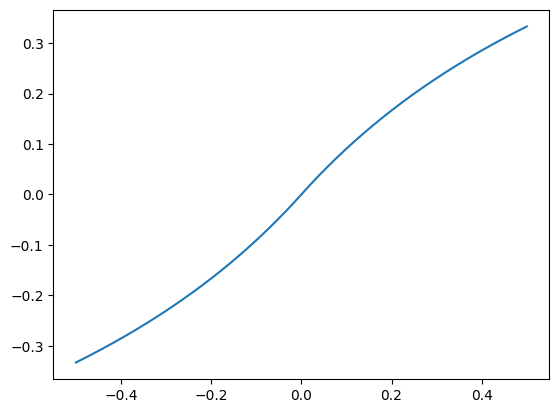

In [49]:
plt.plot(g,y)